## Processing sensor data from Shale Hills CZO TMMS site ##

Marc Berghouse 8/8/2020

This array includes:
- Apogee Instruments SO-110 O2 sensors
- Eosense EosGP CO2 sensors
- tipping bucket

Other data includes:
- PRISM daily precipitation



In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt


# Define filenames
infile1 = "../../raw_data/Shale Hills/TMMS/TMMS_CO2_O2.csv" 
infile2 = "../../raw_data/Shale Hills/Precipitation/PRISM_GarnerRun.csv" 


# Read the .dat files as Pandas dataframes and load in the date/times
df1 = pd.read_csv(infile1,  na_values=['NAN', -9999, -99999], parse_dates=[0], index_col=0) 
df2 = pd.read_csv(infile2, na_values=['NAN', -9999, -99999], skiprows=10, parse_dates=[0], index_col=0) 


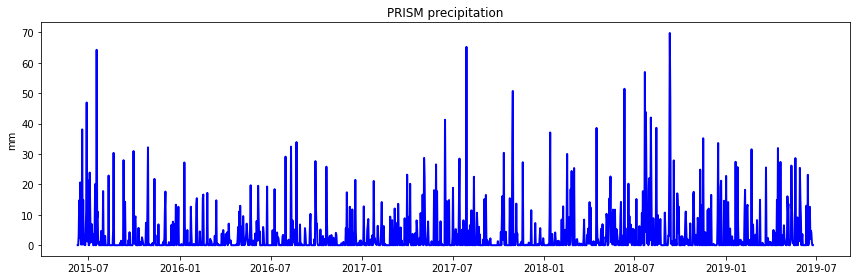

In [2]:
fig, (ax1) = plt.subplots(1, figsize=(12,4), sharex=True, tight_layout=True)
ax1.plot(df2.index, df2['ppt (mm)'], 'b', linewidth=2)
ax1.set(ylabel='mm', title='PRISM precipitation');

In [3]:
#merge dataframes and drop record columns
df1=df1.drop(columns="RECORD")
df=pd.concat([df1,df2], sort=False)

print(df['ppt (mm)'])

2015-06-10 14:00:00     NaN
2015-06-10 15:00:00     NaN
2015-06-10 16:00:00     NaN
2015-06-10 17:00:00     NaN
2015-06-10 18:00:00     NaN
                       ... 
2019-06-20 00:00:00    4.78
2019-06-21 00:00:00    4.14
2019-06-22 00:00:00    1.04
2019-06-23 00:00:00    0.00
2019-06-24 00:00:00    0.00
Name: ppt (mm), Length: 26638, dtype: float64


In [4]:
#Rename all columns with format "var_depth.unit" (SoilTemp_102cm.deg.C)

df.columns=["DiffVolt_30cm.mV", "DiffVolt_80cm.mV", "O2_30cm.percent.0-100", "O2_80cm.percent.0-100",  "ApogeeTemp_30cm.deg.C" , "ApogeeTemp_80cm.deg.C", "CO2lo_30cm.ppm","CO2hi_30cm.ppm", "GPTemp_30cm.deg.C", "CO2lo_80cm.ppm", "CO2hi_80cm.ppm", "GPTemp_80cm.deg.C", "PRISM_precip.mm"]
print(df)

                     DiffVolt_30cm.mV  DiffVolt_80cm.mV  \
2015-06-10 14:00:00         48.380001         43.770000   
2015-06-10 15:00:00         48.340000         43.790001   
2015-06-10 16:00:00         48.270000         43.799999   
2015-06-10 17:00:00         48.270000         43.799999   
2015-06-10 18:00:00         48.200001         43.799999   
...                               ...               ...   
2019-06-20 00:00:00               NaN               NaN   
2019-06-21 00:00:00               NaN               NaN   
2019-06-22 00:00:00               NaN               NaN   
2019-06-23 00:00:00               NaN               NaN   
2019-06-24 00:00:00               NaN               NaN   

                     O2_30cm.percent.0-100  O2_80cm.percent.0-100  \
2015-06-10 14:00:00              20.110001              16.540001   
2015-06-10 15:00:00              20.090000              16.549999   
2015-06-10 16:00:00              20.059999              16.549999   
2015-06-10 17:0

In [5]:
#Mask whole dataframe
df.mask(df<=-0.01, inplace=True)

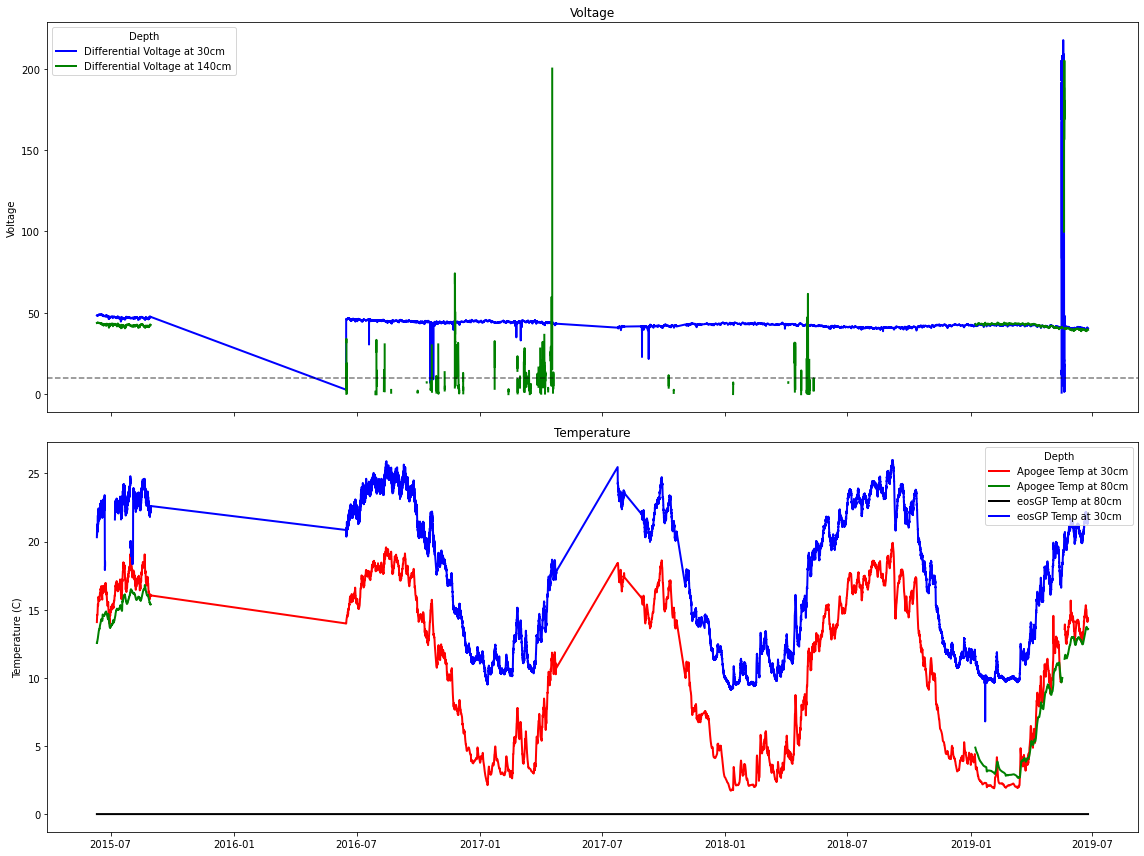

In [6]:
# Plot the datalogger parameters
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,12), tight_layout=True)

# Apogee SO-110 differntial voltages
ax1.plot(df.index, df['DiffVolt_30cm.mV'], 'b', linewidth=2, label='Differential Voltage at 30cm')
ax1.plot(df.index, df['DiffVolt_80cm.mV'], 'g', linewidth=2, label='Differential Voltage at 140cm')
ax1.set(ylabel='Voltage', title='Voltage')#, ylim=[36,48])
ax1.axhline(y=10, linestyle='--', color='k', alpha=0.5)
ax1.legend(title='Depth', loc='best')

# datalogger temperatures

ax2.plot(df.index, df["ApogeeTemp_30cm.deg.C"], 'r', linewidth=2, label='Apogee Temp at 30cm')
ax2.plot(df.index, df["ApogeeTemp_80cm.deg.C"], 'g', linewidth=2, label='Apogee Temp at 80cm')
ax2.plot(df.index, df['GPTemp_80cm.deg.C'], 'k', linewidth=2, label='eosGP Temp at 80cm')
ax2.plot(df.index, df['GPTemp_30cm.deg.C'], 'b', linewidth=2, label='eosGP Temp at 30cm')
ax2.set(ylabel='Temperature (C)', title='Temperature')
ax2.legend(title='Depth', loc='best')


In [7]:
df=df.drop(columns='DiffVolt_80cm.mV')
df=df.drop(columns='DiffVolt_30cm.mV')
df=df.drop(columns='GPTemp_30cm.deg.C')
df=df.drop(columns='GPTemp_80cm.deg.C')


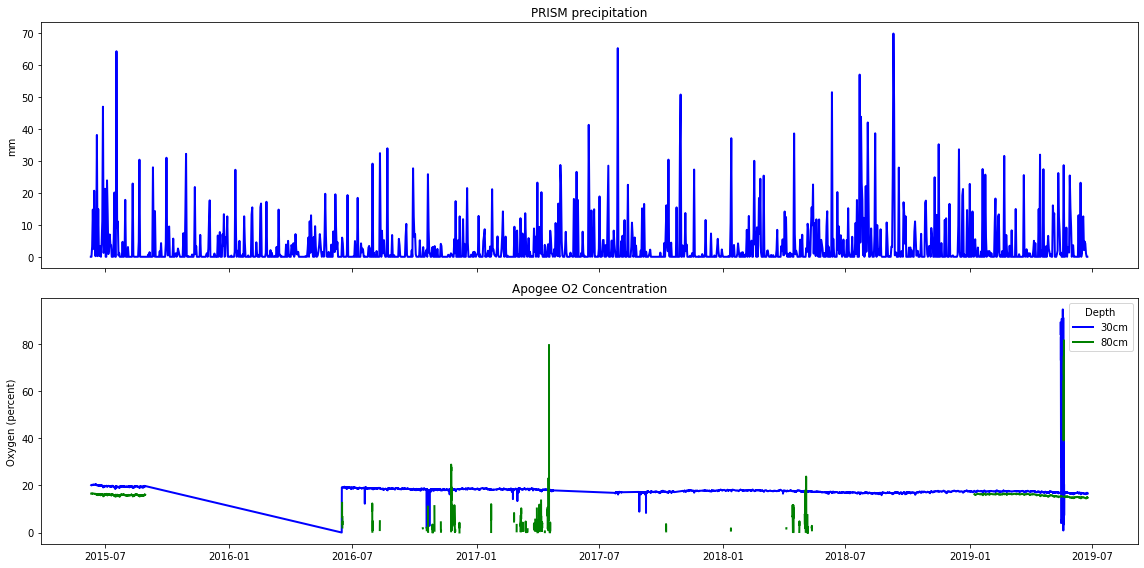

In [8]:
#Plot O2 and precipitation data

fig, (ax1, ax2) = plt.subplots(2, figsize=(16,8), sharex=True, tight_layout=True)
ax1.plot(df.index, df['PRISM_precip.mm'], 'b', linewidth=2)
ax1.set(ylabel='mm', title='PRISM precipitation')

ax2.plot(df.index, df['O2_30cm.percent.0-100'], 'b', linewidth=2, label='30cm')
ax2.set(ylabel='Oxygen (percent)', title='Apogee O2 Concentration')
ax2.plot(df.index, df['O2_80cm.percent.0-100'], 'g', linewidth=2, label='80cm')
ax2.legend(title='Depth', loc='best')


In [9]:
#Drop bad O2 data
#Should we keep the last 5 months of O2 data for 80cm?
df=df.drop(columns='O2_80cm.percent.0-100')
df['O2_30cm.percent.0-100'].mask(df['O2_30cm.percent.0-100']>=25, inplace=True)


In [10]:
print(df.loc['2019-05-19', 'O2_30cm.percent.0-100'])

2019-05-19 00:00:00          NaN
2019-05-19 01:00:00          NaN
2019-05-19 02:00:00          NaN
2019-05-19 03:00:00    24.879999
2019-05-19 04:00:00    17.500000
2019-05-19 05:00:00    18.340000
2019-05-19 06:00:00    11.550000
2019-05-19 07:00:00     9.920000
2019-05-19 08:00:00     4.029000
2019-05-19 09:00:00     4.683000
2019-05-19 10:00:00     1.508000
2019-05-19 11:00:00     5.970000
2019-05-19 12:00:00     0.909000
2019-05-19 13:00:00    21.120001
2019-05-19 14:00:00          NaN
2019-05-19 15:00:00          NaN
2019-05-19 16:00:00          NaN
2019-05-19 17:00:00          NaN
2019-05-19 18:00:00          NaN
2019-05-19 19:00:00          NaN
2019-05-19 20:00:00    12.790000
2019-05-19 21:00:00          NaN
2019-05-19 22:00:00    20.900000
2019-05-19 23:00:00     9.030000
2019-05-19 00:00:00          NaN
Name: O2_30cm.percent.0-100, dtype: float64


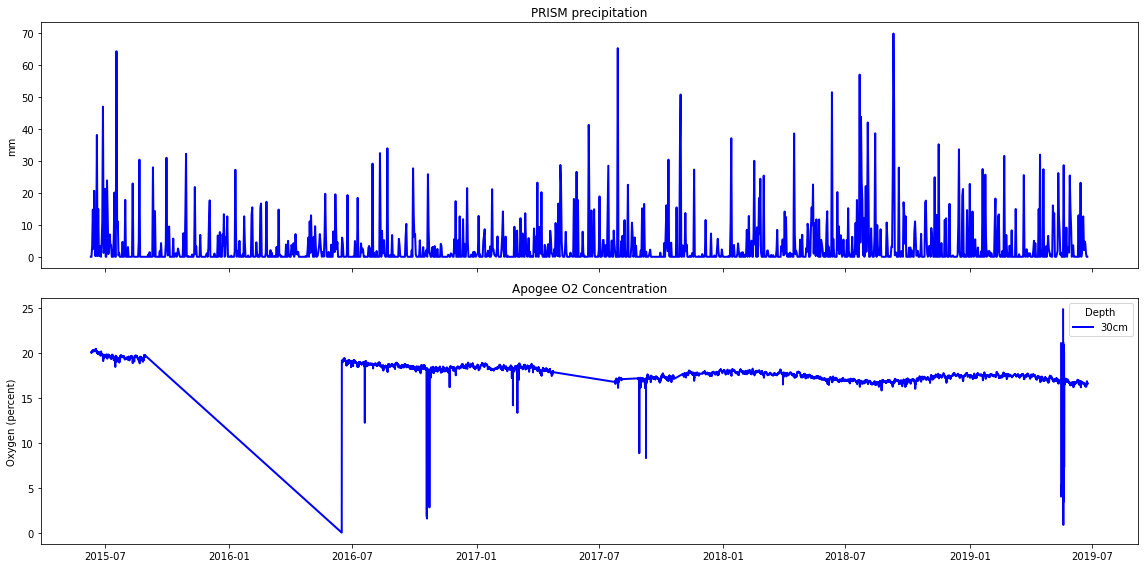

In [11]:
#Plot O2 and precipitation data

fig, (ax1, ax2) = plt.subplots(2, figsize=(16,8), sharex=True, tight_layout=True)
ax1.plot(df.index, df['PRISM_precip.mm'], 'b', linewidth=2)
ax1.set(ylabel='mm', title='PRISM precipitation')

ax2.plot(df.index, df['O2_30cm.percent.0-100'], 'b', linewidth=2, label='30cm')
ax2.set(ylabel='Oxygen (percent)', title='Apogee O2 Concentration')
ax2.legend(title='Depth', loc='best')


In [12]:
#Combine CO2lo and CO2hi

mask = df['CO2lo_30cm.ppm'] < 5000
df.loc[mask, 'CO2_30cm.ppm'] = df.loc[mask, 'CO2lo_30cm.ppm']
df.loc[~mask, 'CO2_30cm.ppm'] = df.loc[~mask, 'CO2hi_30cm.ppm']
mask2 = df['CO2lo_80cm.ppm'] < 5000
df.loc[mask2, 'CO2_80cm.ppm'] = df.loc[mask2, 'CO2lo_80cm.ppm']
df.loc[~mask2, 'CO2_80cm.ppm'] = df.loc[~mask2, 'CO2hi_80cm.ppm']

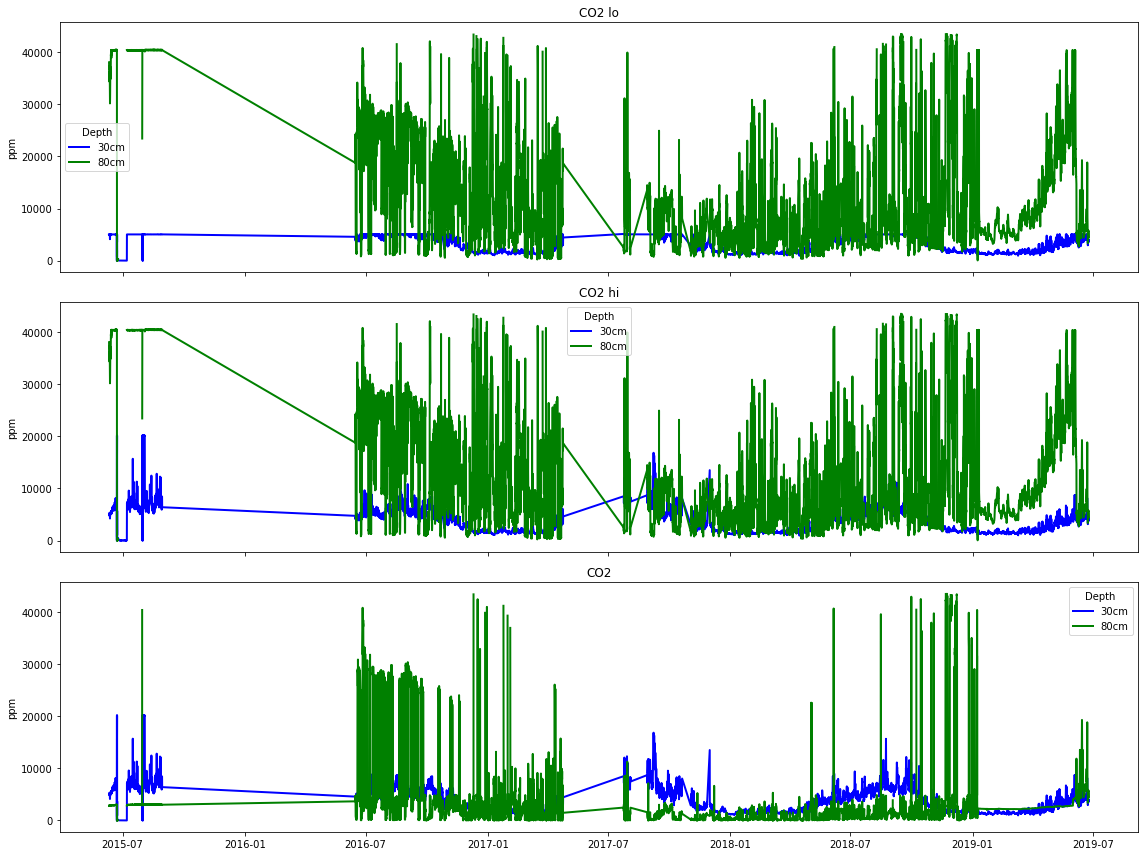

In [13]:
#Plot CO2 data 


fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(16,12), sharex=True, tight_layout=True)
ax1.plot(df.index, df['CO2lo_30cm.ppm'], 'b', linewidth=2, label='30cm')
ax1.plot(df.index, df['CO2hi_80cm.ppm'], 'g', linewidth=2, label='80cm')
ax1.set(ylabel='ppm', title='CO2 lo')
ax1.legend(title='Depth', loc='best')
ax2.plot(df.index, df['CO2hi_30cm.ppm'], 'b', linewidth=2, label='30cm')
ax2.plot(df.index, df['CO2hi_80cm.ppm'], 'g', linewidth=2, label='80cm')
ax2.set(ylabel='ppm', title='CO2 hi')
ax2.legend(title='Depth', loc='best')
ax3.plot(df.index, df['CO2_30cm.ppm'], 'b', linewidth=2, label='30cm')
ax3.plot(df.index, df['CO2_80cm.ppm'], 'g', linewidth=2, label='80cm')
ax3.set(ylabel='ppm', title='CO2')
ax3.legend(title='Depth', loc='best')

In [14]:
#Drop bad CO2 data
#If we can smooth the 80cm data it might be usable
df=df.drop(columns='CO2lo_80cm.ppm')
df=df.drop(columns='CO2hi_80cm.ppm')
df=df.drop(columns='CO2lo_30cm.ppm')
df=df.drop(columns='CO2hi_30cm.ppm')
df=df.drop(columns='CO2_80cm.ppm')




In [15]:
output=df.copy()
today = dt.date.today()
outfile = '../../processed_data/Shale Hills/TMMS_processed.csv'
output.to_csv(outfile, na_rep=-99999, index_label='DateTime.MST')

In [16]:
output

,O2_30cm.percent.0-100,ApogeeTemp_30cm.deg.C,ApogeeTemp_80cm.deg.C,PRISM_precip.mm,CO2_30cm.ppm
2015-06-10 14:00:00,20.110001,14.09,12.57,NaN,5043.2441
2015-06-10 15:00:00,20.090000,14.17,12.58,NaN,5113.5142
2015-06-10 16:00:00,20.059999,14.23,12.58,NaN,4994.5952
2015-06-10 17:00:00,20.059999,14.30,12.57,NaN,4982.4331
2015-06-10 18:00:00,20.040001,14.38,12.57,NaN,5027.0269
...,...,...,...,...,...
2019-06-20 00:00:00,NaN,NaN,NaN,4.78,NaN
2019-06-21 00:00:00,NaN,NaN,NaN,4.14,NaN
2019-06-22 00:00:00,NaN,NaN,NaN,1.04,NaN
2019-06-23 00:00:00,NaN,NaN,NaN,0.00,NaN
